In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
from sklearn.cross_validation import train_test_split
import re

%matplotlib inline

In [2]:
tt9 = pd.read_csv('../data/db15/helpers/tt9.csv')
tt15 = pd.read_csv('../data/db15/helpers/tt15.csv')

In [3]:
tt15[tt15['T2 Type'] == 'Technology'].major_title.unique()

array(['Management Occupations',
       'Business and Financial Operations Occupations', nan,
       'Computer and Mathematical Occupations',
       'Architecture and Engineering Occupations',
       'Life, Physical, and Social Science Occupations',
       'Community and Social Service Occupations', 'Legal Occupations',
       'Education, Training, and Library Occupations',
       'Arts, Design, Entertainment, Sports, and Media Occupations',
       'Healthcare Practitioners and Technical Occupations',
       'Healthcare Support Occupations', 'Protective Service Occupations',
       'Food Preparation and Serving Related Occupations',
       'Building and Grounds Cleaning and Maintenance Occupations',
       'Personal Care and Service Occupations',
       'Sales and Related Occupations',
       'Office and Administrative Support Occupations',
       'Farming, Fishing, and Forestry Occupations',
       'Construction and Extraction Occupations',
       'Installation, Maintenance, and Repai

# New occpuations

In [4]:
code= 'O*NET-SOC Code'
occ9 = set(tt9[code])
occ15 = set(tt15[code])

new = occ15 - occ9
entries = tt15[tt15[code].isin(new)]
further_subset = entries[~entries.Title.isin(tt9.Title)]

In [5]:
df = further_subset[['O*NET-SOC Code', 'Title', 'broad_title', 'minor_title', 'major_title']].drop_duplicates()

In [6]:
df.to_csv('../data/db15/helpers/new_non_cleaned_occupations.csv', index = False)

In [7]:
df

,O*NET-SOC Code,Title,broad_title,minor_title,major_title
166,11-1031.00,Legislators,Legislators,Top Executives,Management Occupations
818,11-3051.01,Quality Control Systems Managers,Industrial Production Managers,Operations Specialties Managers,Management Occupations
1495,11-9013.01,Nursery and Greenhouse Managers,"Farmers, Ranchers, and Other Agricultural Mana...",Other Management Occupations,Management Occupations
1561,11-9013.02,Farm and Ranch Managers,"Farmers, Ranchers, and Other Agricultural Mana...",Other Management Occupations,Management Occupations
1669,11-9013.03,Aquacultural Managers,"Farmers, Ranchers, and Other Agricultural Mana...",Other Management Occupations,Management Occupations
1904,11-9039.01,Distance Learning Coordinators,Education Administrators,Other Management Occupations,Management Occupations
1947,11-9039.02,Fitness and Wellness Coordinators,Education Administrators,Other Management Occupations,Management Occupations
2465,11-9131.00,Postmasters and Mail Superintendents,Postmasters and Mail Superintendents,Other Management Occupations,Management Occupations
2585,11-9161.00,Emergency Management Directors,Emergency Management Directors,Other Management Occupations,Management Occupations
2766,11-9199.03,Investment Fund Managers,Miscellaneous Managers,Other Management Occupations,Management Occupations


In [8]:
filt = ['O*NET-SOC Code', 'Title', 'broad_title', 'minor_title', 'major_title']
tt15_occs = tt15[filt].drop_duplicates()
tt9_occs = tt9[filt].drop_duplicates()
tt9_occs[tt9_occs.Title.apply(lambda x: 'market research' in x.lower())]

,O*NET-SOC Code,Title,broad_title,minor_title,major_title
15147,19-3021.00,Market Research Analysts,NaN,NaN,NaN


## Emerging

In [9]:
nae = pd.read_csv('../data/db15/helpers/bright_outlooks/New_and_Emerging.csv')
subset = tt15[tt15['O*NET-SOC Code'].isin(nae.Code)][filt].drop_duplicates()
subset[~subset['O*NET-SOC Code'].isin(occ9)].to_csv('../data/db15/helpers/new_emerging_since_2009.csv', index = True)

In [10]:
tt15_occs[~tt15_occs.minor_title.isin(tt9_occs.minor_title)].minor_title.unique()

array(['Religious Workers', 'Postsecondary Teachers',
       'Animal Care and Service Workers', 'Personal Appearance Workers',
       'Tour and Travel Guides', 'Communications Equipment Operators',
       'Fishing and Hunting Workers',
       'Textile, Apparel, and Furnishings Workers'], dtype=object)

# How often does ONET update?

- Since 2009 at least skills updated
- but taxonomy updated every so often – last in 2010

# Automation by new occupations

In [11]:
nae = pd.read_csv('../data/db15/helpers/new_emerging_since_2009.csv')

In [191]:
automation = pd.read_csv('../data/db15/helpers/delta_9_15.csv')

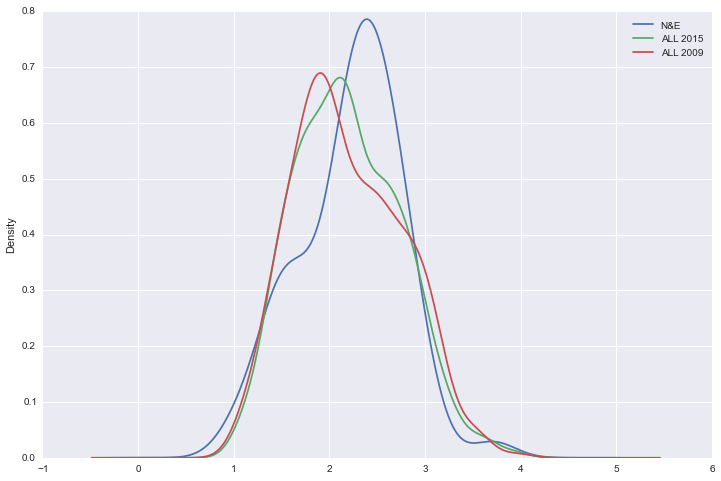

In [13]:
sns.plt.figure(figsize = (12,8))
automation[automation['O*NET-SOC Code'].isin(nae['O*NET-SOC Code'])].automation_15.plot(kind = 'kde', label = 'N&E')
automation.automation_15.plot(kind = 'kde', label = 'ALL 2015')
automation.automation_9.plot(kind = 'kde', label = 'ALL 2009')

sns.plt.legend()

# Adoption propensity of new technologies

In [14]:
nae_tech = tt15[tt15['O*NET-SOC Code'].isin(nae['O*NET-SOC Code'])]

In [15]:
non_nae_tech = tt15[~tt15['O*NET-SOC Code'].isin(nae['O*NET-SOC Code'])]

In [16]:
nae_tech[nae_tech.segment_code == 43000000].groupby('O*NET-SOC Code').count()['T2 Type'].mean()

44.83606557377049

In [17]:
non_nae_tech[non_nae_tech.segment_code == 43000000].groupby('O*NET-SOC Code').count()['T2 Type'].mean()

27.42151481888035

> ### N&E occupations adopt at a massively higher rate

# New technologies similar in polarization

# Technology Use vs. Automation

In [193]:
tech_counts = pd.DataFrame(tt15[tt15['T2 Type'] == 'Technology'].groupby("O*NET-SOC Code").count()['T2 Type']).reset_index()
tech_counts.columns = ['O*NET-SOC Code', 'num_tech']
merged = automation.merge(tech_counts, how = 'left', on = 'O*NET-SOC Code')

In [194]:
merged.head()

,O*NET-SOC Code,automation_15,automation_9,delta,delta_pct,Title,num_tech
0,43-5081.03,3.01,1.53,1.48,0.967320,"Stock Clerks- Stockroom, Warehouse, or Storage...",8
1,19-1020.01,2.02,1.07,0.95,0.887850,Biologists,47
2,41-2012.00,3.11,1.74,1.37,0.787356,Gaming Change Persons and Booth Cashiers,4
3,47-2011.00,2.64,1.57,1.07,0.681529,Boilermakers,7
4,21-2011.00,2.01,1.25,0.76,0.608000,Clergy,10


In [217]:
np.mean(abs(merged.delta_pct) < 0.03)

0.38364779874213839

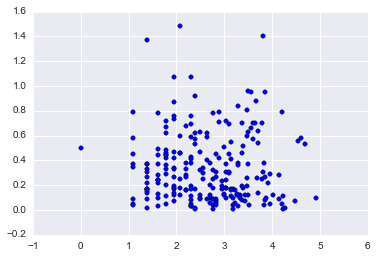

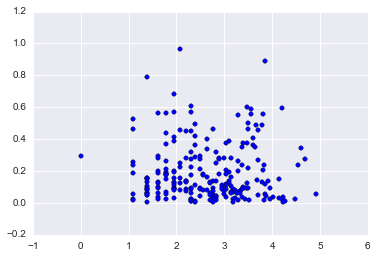

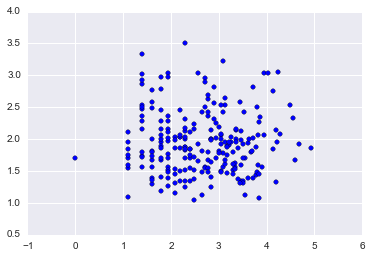

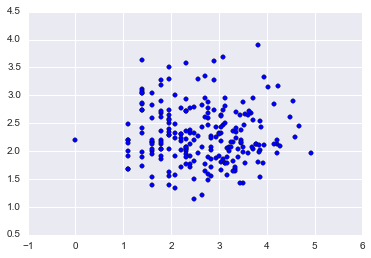

In [215]:
merged_ss = merged[merged.delta > 0]

for outcome in ['delta', 'delta_pct', 'automation_9', 'automation_15']:
    sns.plt.figure()
    sns.plt.scatter(np.log(merged_ss.num_tech), merged_ss[outcome])

# Technological Adoption vs. Automation

### using number of tech adopted since 2009

In [91]:
tech15 = tt15[tt15['T2 Type'] == 'Technology']
tech9 = tt9[tt9['T2 Type'] == 'Technology']

occs = set(tech9['O*NET-SOC Code'])

new_df = pd.DataFrame(columns=tech9.columns)

for occ in occs:
    pre_gb = tech9[tech9['O*NET-SOC Code'] == occ]
    post_gb = tech15[tech15['O*NET-SOC Code'] == occ]
    new = post_gb[(~post_gb['Commodity Code'].isin(pre_gb['Commodity Code'])) & (~post_gb['T2 Example'].isin(pre_gb['T2 Example']))]
    new_df = new_df.append(new)

In [134]:
counts = new_df.groupby('O*NET-SOC Code').count()['Title']
counts_df = pd.DataFrame(counts)
counts_df.columns = ['count']
counts_df = counts_df.reset_index()

In [142]:
automation_counts = automation[automation['O*NET-SOC Code'].isin(occs)].merge(counts_df, how = 'left', on = 'O*NET-SOC Code')
automation_counts['count'] = automation_counts['count'].fillna(0)
automation_counts.head()

,O*NET-SOC Code,automation_15,automation_9,delta,delta_pct,Title,count
0,19-1020.01,2.02,1.07,0.95,0.887850,Biologists,1
1,41-2012.00,3.11,1.74,1.37,0.787356,Gaming Change Persons and Booth Cashiers,0
2,47-2011.00,2.64,1.57,1.07,0.681529,Boilermakers,1
3,17-2131.00,2.15,1.34,0.81,0.604478,Materials Engineers,2
4,15-2021.00,2.12,1.33,0.79,0.593985,Mathematicians,0


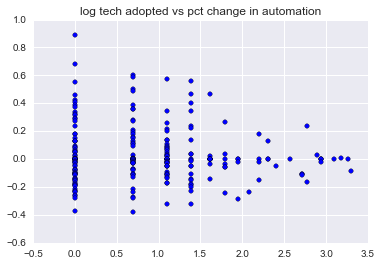

In [150]:
sns.plt.scatter(np.log(automation_counts['count']), automation_counts.delta_pct)
sns.plt.title( 'log tech adopted vs pct change in automation')

### Using ```#tech 2015 - #tech 2009```

In [158]:
from collections import defaultdict

tech15 = tt15[tt15['T2 Type'] == 'Technology']
tech9 = tt9[tt9['T2 Type'] == 'Technology']

occs = set(tech9['O*NET-SOC Code'])

abs_tech_df = defaultdict(int)

for occ in occs:
    pre_gb = len(tech9[tech9['O*NET-SOC Code'] == occ])
    post_gb = len(tech15[tech15['O*NET-SOC Code'] == occ])
    abs_tech_df[occ] = post_gb = pre_gb
    
abs_tech_df = pd.DataFrame(dict(abs_tech_df).items(), columns = ['O*NET-SOC Code', 'tech_count'])

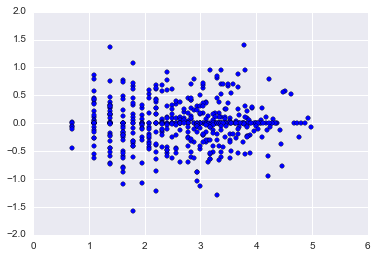

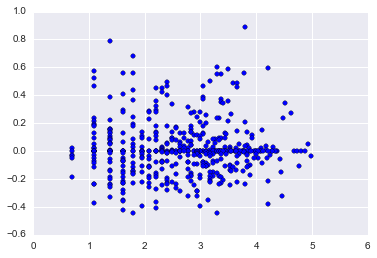

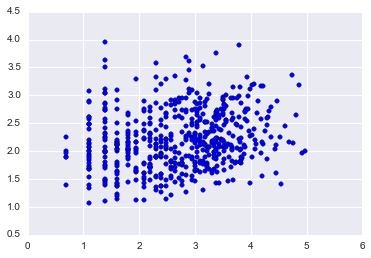

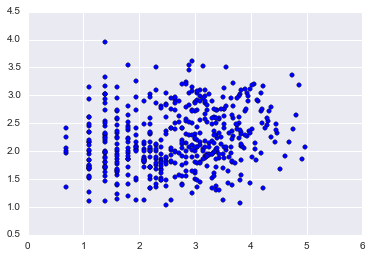

In [213]:
sns.plt.figure(figsize = (10, 10))
a_counts = automation[automation['O*NET-SOC Code'].isin(occs)].merge(abs_tech_df, how = 'left', on = 'O*NET-SOC Code')
a_counts['tech_count'] = a_counts['tech_count'].fillna(0)

for outcome in ['delta', 'delta_pct', 'automation_15', 'automation_9']:
    sns.plt.figure()
    sns.plt.scatter(np.log(a_counts.tech_count), a_counts[outcome])

# Non-technology adoptions

In [ ]:
tech15 = tt15.groupby('O*NET-SOC Code')[['O*NET-SOC Code', 'Commodity Code', 'T2 Example']]
tech9 = tt9.groupby('O*NET-SOC Code')[['O*NET-SOC Code', 'Commodity Code', 'T2 Example']]
occs = set(tech9['O*NET-SOC Code'])

new_df = pd.DataFrame(columns=tech9.columns)
for occ in occs:
    pre_gb = tech9[tech9['O*NET-SOC Code'] == occ]
    post_gb = tech15[tech15['O*NET-SOC Code'] == occ]
    new = post_gb[(~post_gb['Commodity Code'].isin(pre_gb['Commodity Code']))]
    new_df = new_df.append(new)

In [211]:
d = pd.read_table('../data/db15/Work Context.txt')
d = d[d['Element Name'] == 'Degree of Automation']

# Skill PCA

In [223]:
X = pd.read_table('../data/db15/Skills.txt')

In [228]:
X = X[X['Scale ID'] == 'LV'].pivot(index = 'O*NET-SOC Code', columns = 'Element Name', values='Data Value').reset_index()

In [234]:
X = X.iloc[:,1:]

In [235]:
from sklearn.decomposition import PCA

In [236]:
pca = PCA()

In [237]:
pca.fit(X)

PCA(copy=True, n_components=None, whiten=False)

In [241]:
first_three = pca.components_[:3]

In [242]:
a = first_three[0]

In [248]:
# find the ten most important skills for each component – that is, the 

In [268]:
a.argsort()[::-1][:5]

array([ 5, 24, 18, 33,  6])

In [276]:
def get_most_important_features(X, num_components, num_features):
    pca = PCA()
    pca.fit(X)
    names = list(X.columns)
    for i in xrange(num_components):
        print "COMPONENT {}:".format(i + 1)
        print "-------------"
        component = pca.components_[i]
        max_indices = component.argsort()[::-1][:num_features]
        for index in max_indices:
            value = component[index]
            name = names[index]
            print "{}: {}".format(round(value, 3), name)
        print " "

In [281]:
get_most_important_features(X, num_components = 5, num_features = 3)

COMPONENT 1:
-------------
0.229: Equipment Maintenance
0.223: Repairing
0.205: Operation and Control
 
COMPONENT 2:
-------------
0.025: Service Orientation
0.013: Social Perceptiveness
-0.002: Negotiation
 
COMPONENT 3:
-------------
0.627: Science
0.126: Reading Comprehension
0.106: Programming
 
COMPONENT 4:
-------------
0.337: Programming
0.303: Mathematics
0.276: Operations Analysis
 
COMPONENT 5:
-------------
0.363: Installation
0.304: Programming
0.286: Repairing
 
